In [3]:
import cv2
import matplotlib.pyplot as plt

In [4]:
def mostrar_imagen(image, title='Imagen'):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [12]:
imagenes_rutas = [f'./imagenes/{i}.png' for i in range(11)]

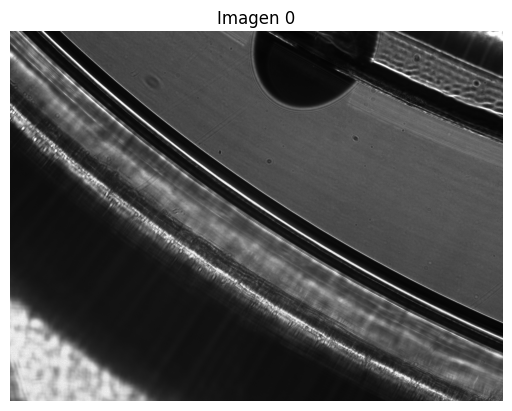

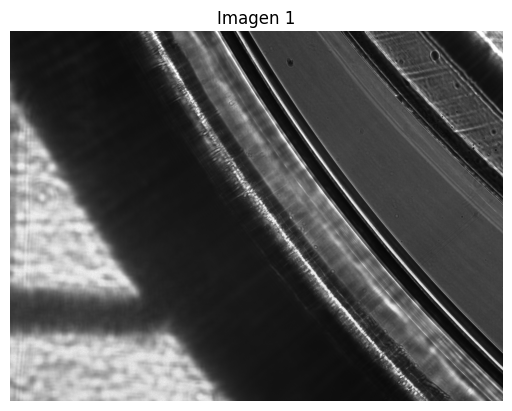

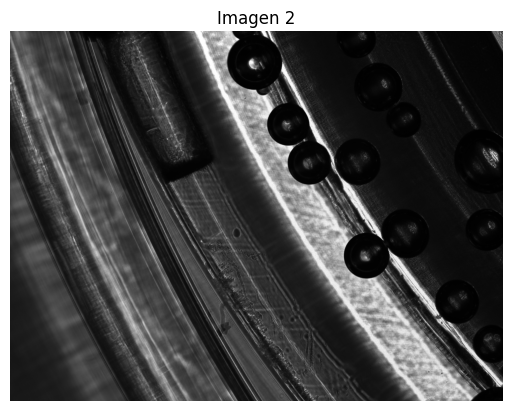

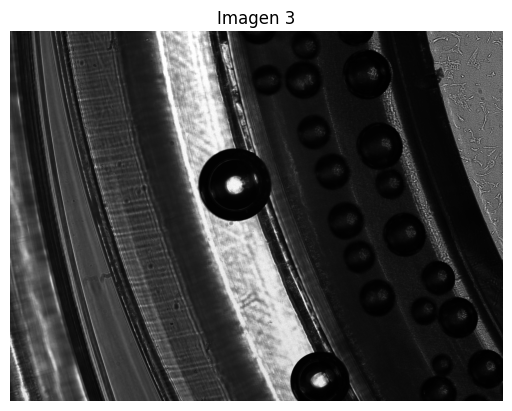

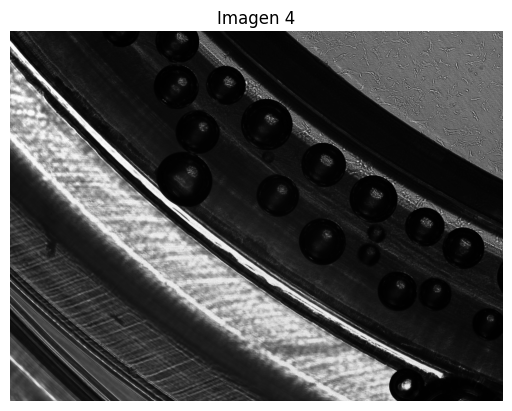

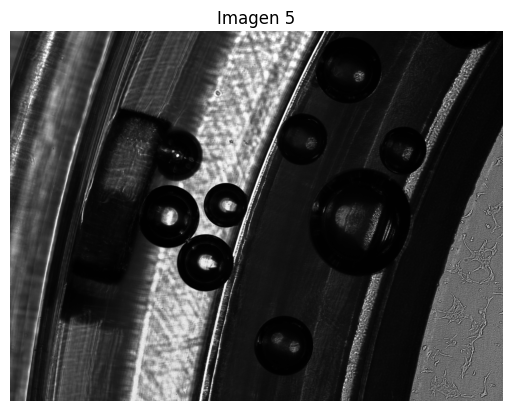

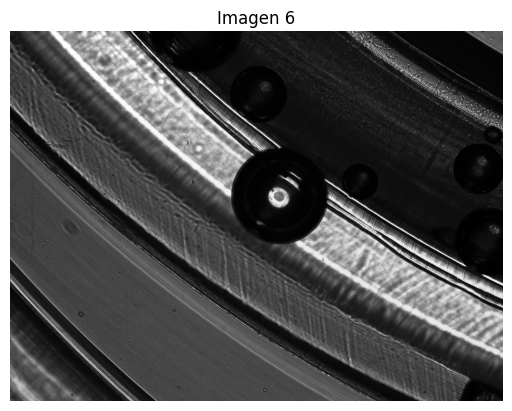

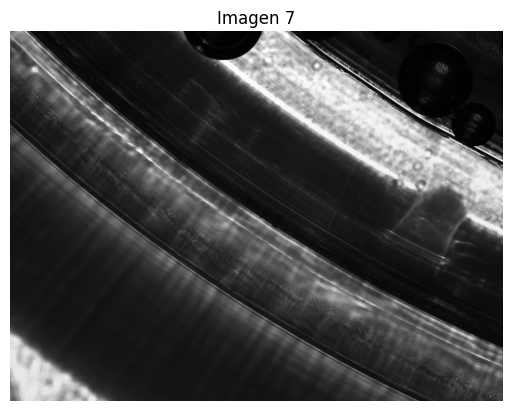

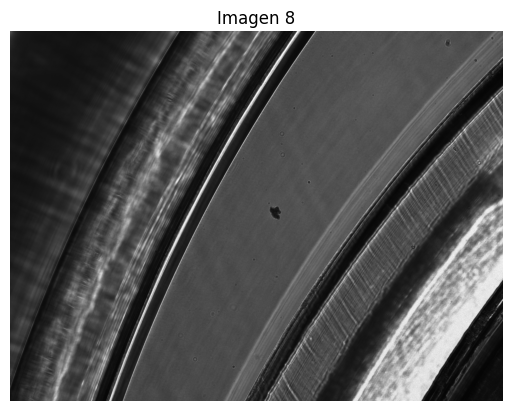

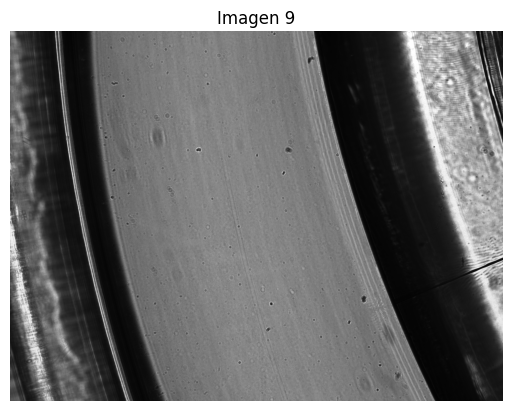

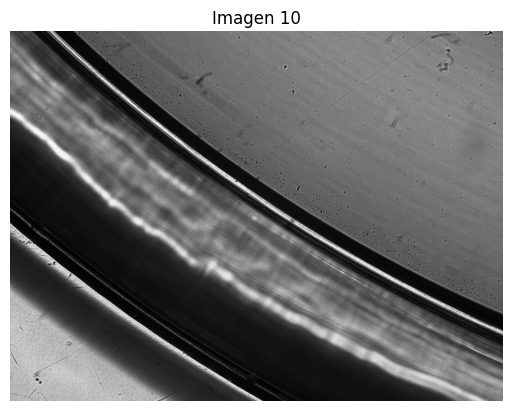

In [14]:
# Mostrar Imagenes Originales

for i, ruta in enumerate(imagenes_rutas):
    imagen = cv2.imread(ruta)

    if imagen is None:
        print(f"No se pudo cargar la imagen en {ruta}")
    else:
        mostrar_imagen(imagen, title=f'Imagen {i}')


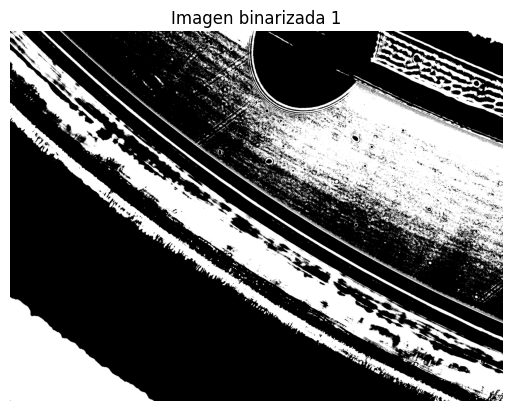

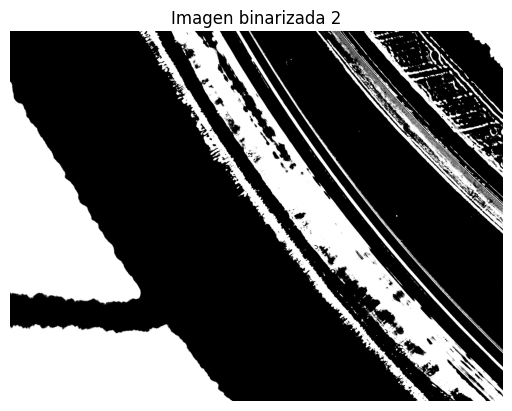

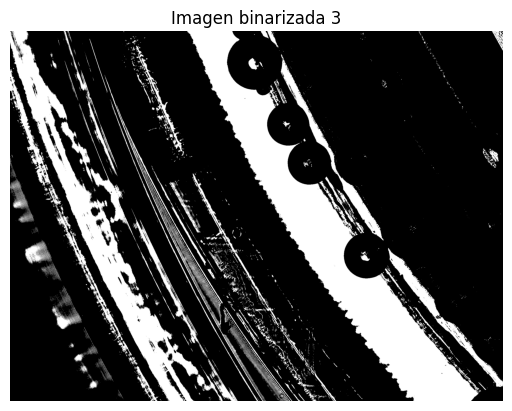

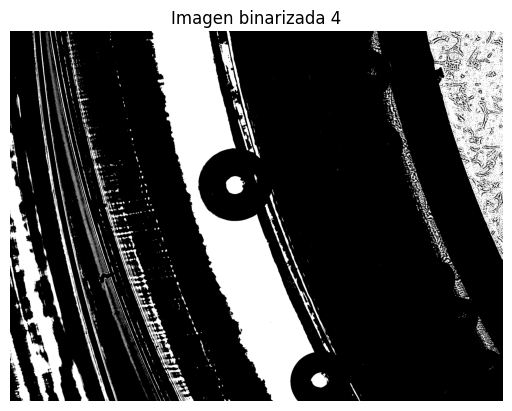

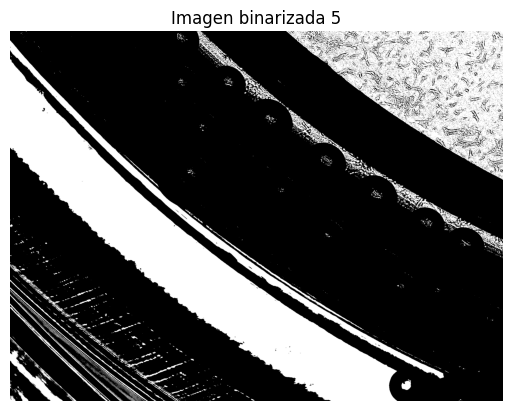

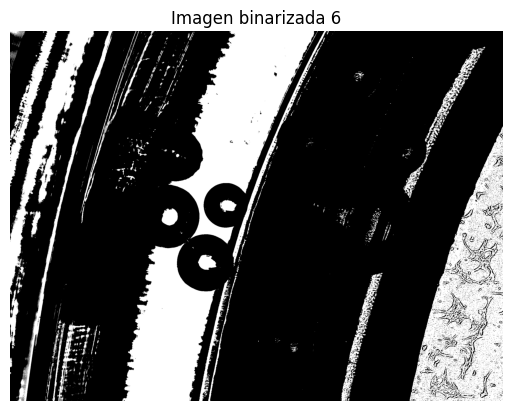

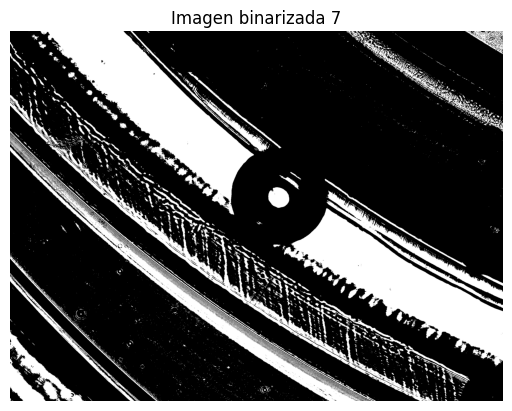

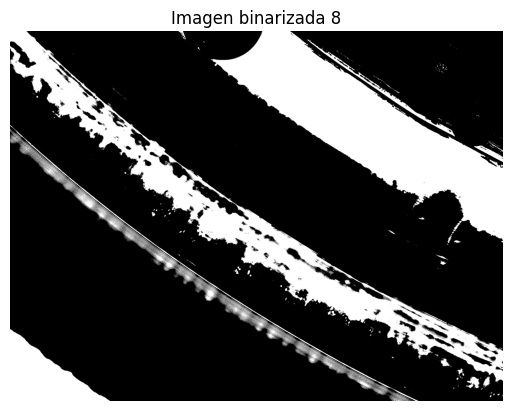

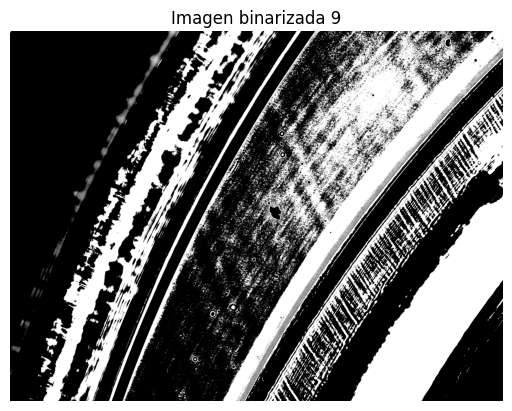

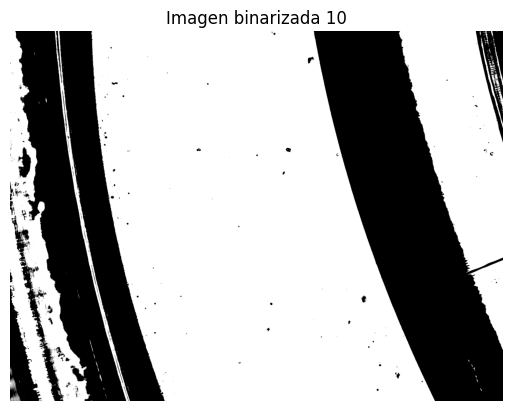

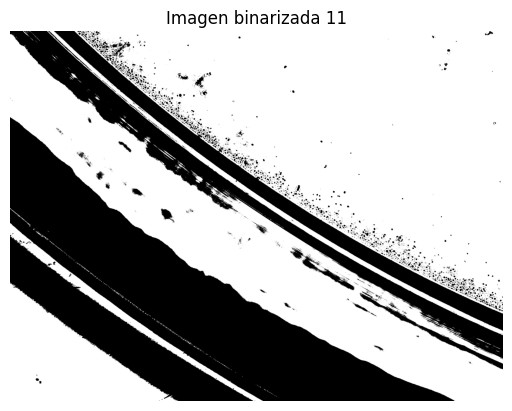

In [20]:
# Imagenes binarizadas

umbral = 80
imagenes_binarizadas = []

for i, ruta in enumerate(imagenes_rutas):
    imagen = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)

    if imagen is None:
        print(f"No se pudo cargar la imagen en {ruta}")
    else:
        _, imagen_binarizada = cv2.threshold(imagen, umbral, 255, cv2.THRESH_BINARY)
        imagenes_binarizadas.append(imagen_binarizada)
        mostrar_imagen(imagen_binarizada, title=f'Imagen binarizada {i+1}')

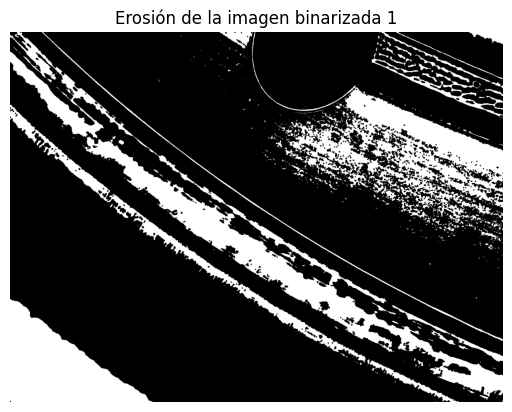

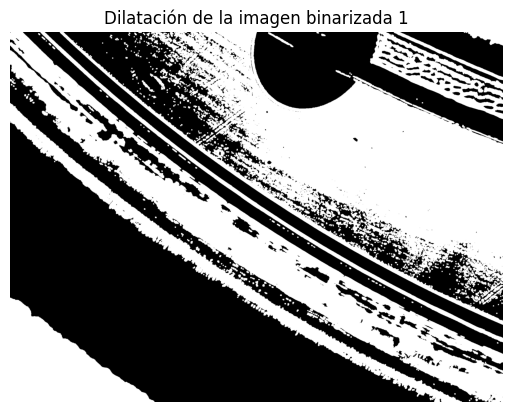

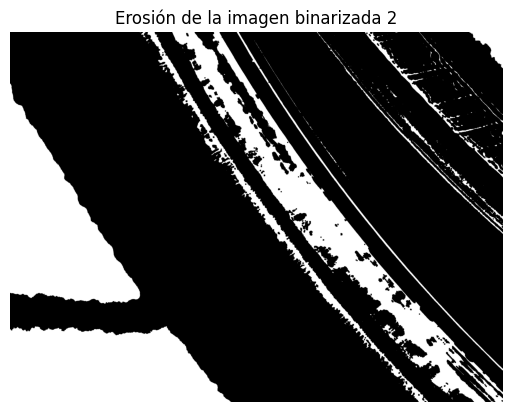

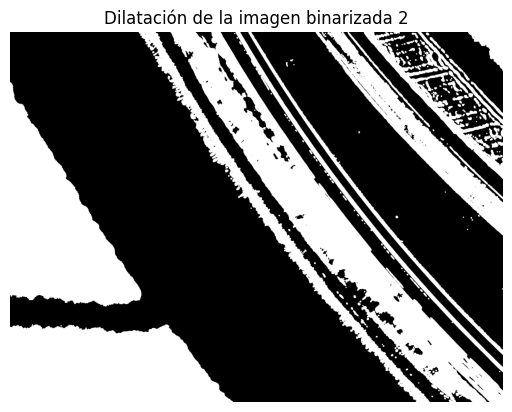

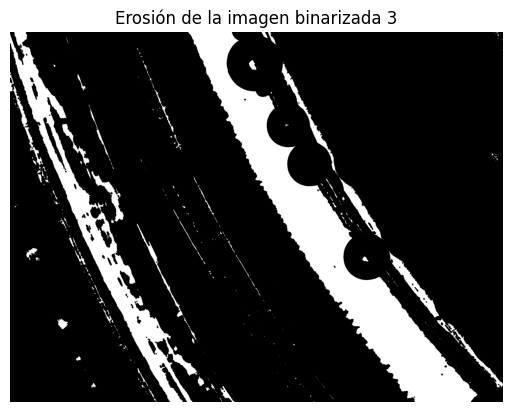

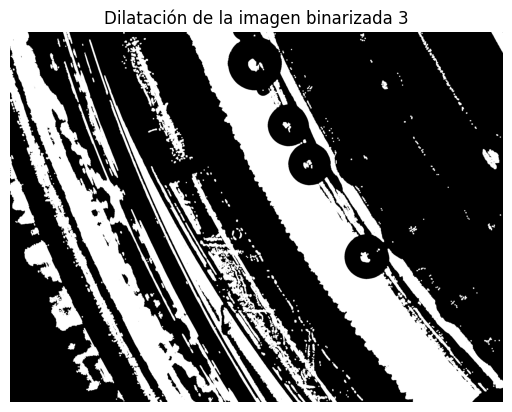

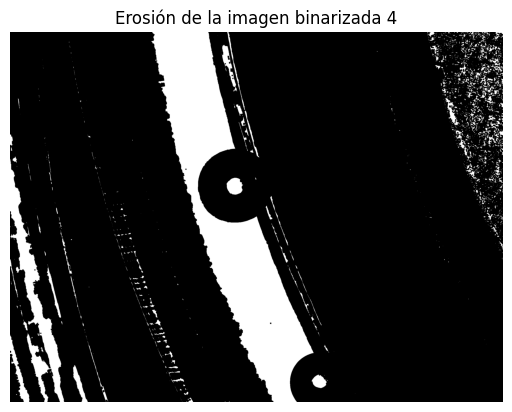

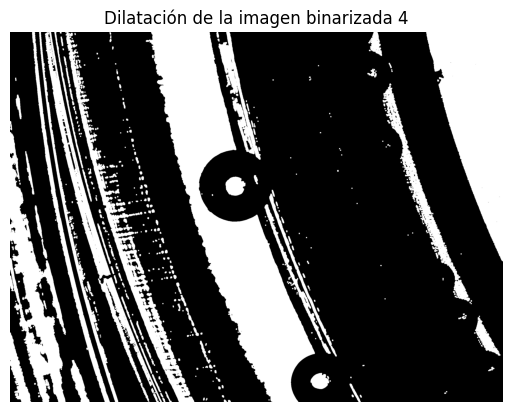

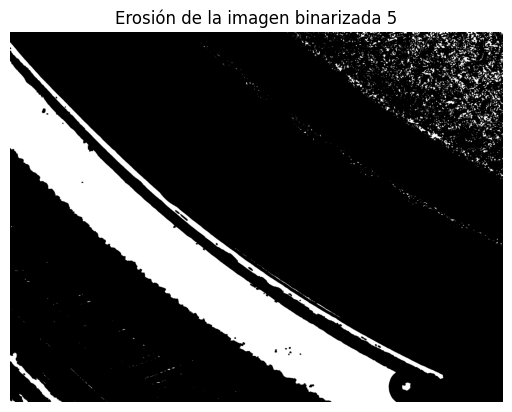

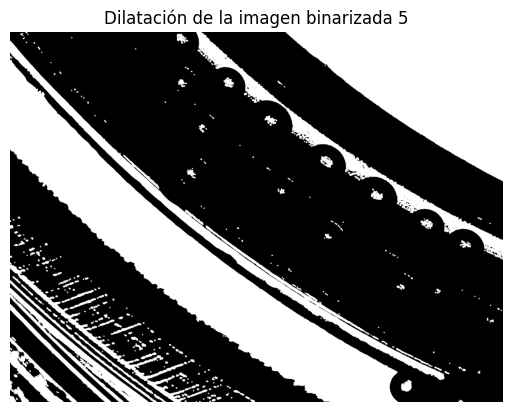

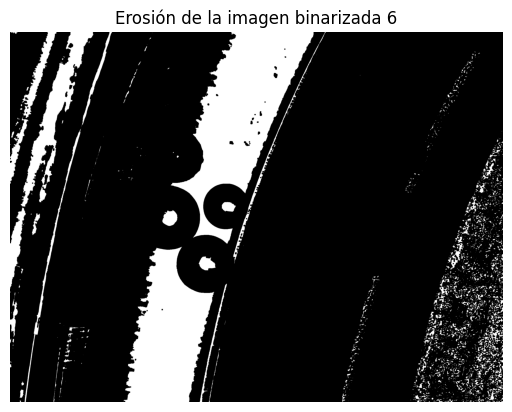

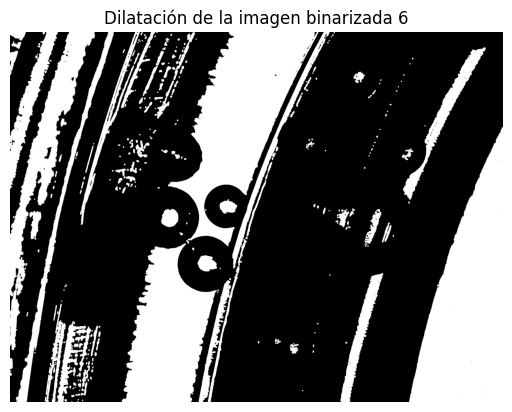

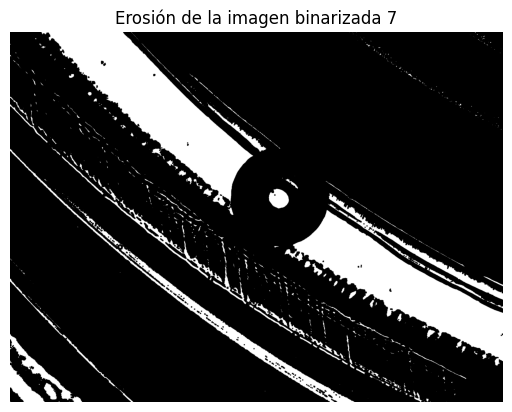

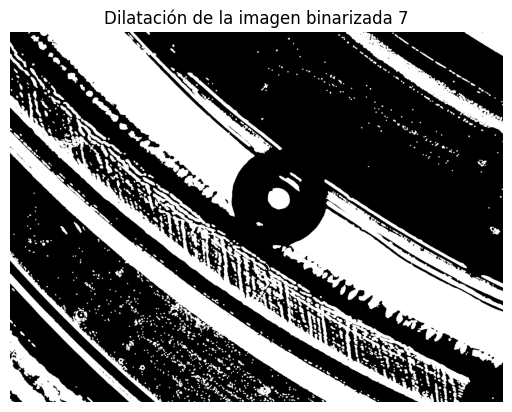

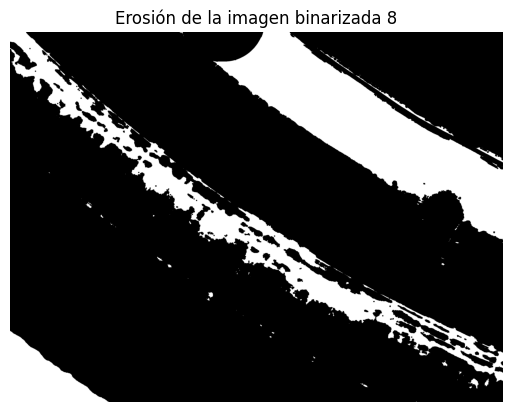

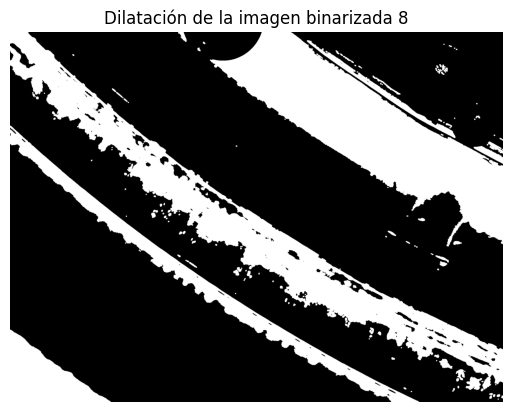

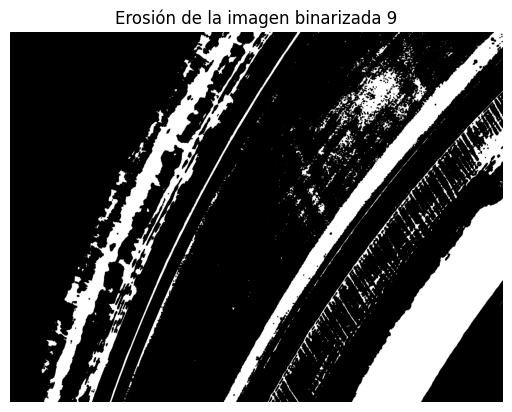

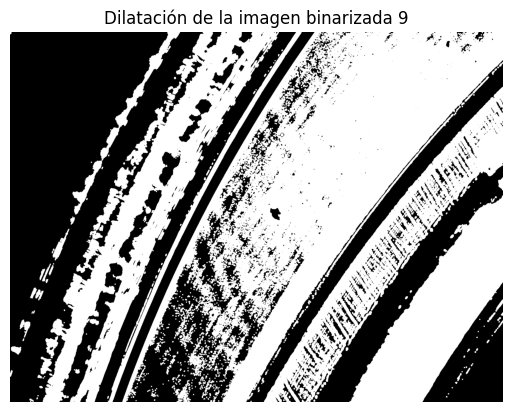

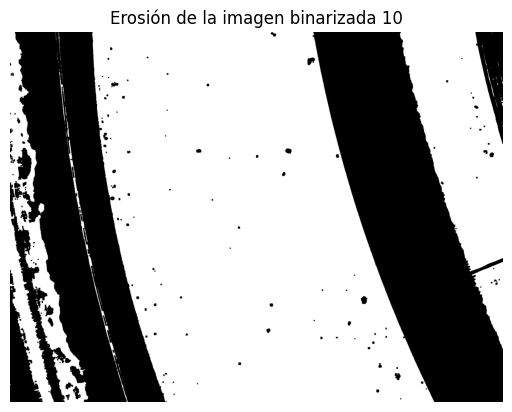

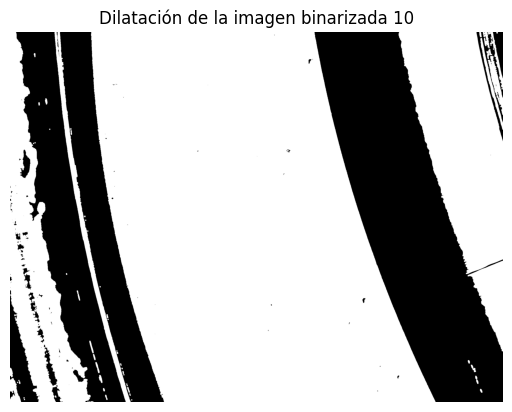

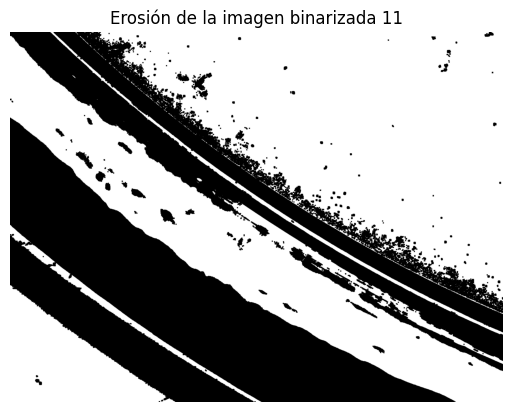

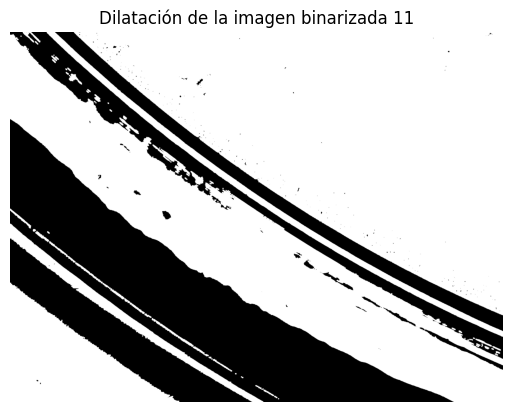

In [21]:
import numpy as np

kernel = np.ones((6, 6), np.uint8)

for i, imagen_binarizada in enumerate(imagenes_binarizadas):
    # Erosión
    imagen_erodida = cv2.erode(imagen_binarizada, kernel, iterations=1)
    mostrar_imagen(imagen_erodida, title=f'Erosión de la imagen binarizada {i+1}')

    # Dilatación
    imagen_dilatada = cv2.dilate(imagen_binarizada, kernel, iterations=1)
    mostrar_imagen(imagen_dilatada, title=f'Dilatación de la imagen binarizada {i+1}')

Parece que el umbral inicial de 127 hacía que se perdieran muchos detalles. De la misma manera parece que el kernel de 3x3 no generaba resultados tan difierentes entre dilatación y erosión, por lo que cambié el umbral a 80 y el kernel a 6x6. Esto permitió extraer más features que estaba buscando. Me estaba enfocando en los circulos que se ven presentes en las imagnes, aunque en otros sets de imagenes de nuestro set del reto podemos obserbar miotubos, por lo que se tendrían que ajustar otra vez estos valores para extraer de una mejor manera las features que buscamos.